# EEG Visualization
Dataset: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/eeg.html  
  
Note: I didn't understand the documentation for this data, so a lot of my analysis was based on inference. There were no headers, so I assumed each csv file contained several trials for a single channel as a function of timesteps (of unknown size) for that subject. I averaged the trials, to get a single line for each channel (per subject)

## Import Necessary Packages and Initialize Important Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
subjects = {'A00053375': {'csv_path': '', 'csv_list': []},
               'A00053480': {'csv_path': '', 'csv_list': []}
              }
subject_ids = list(subjects.keys())
data_path = '/Users/morgs/NDD/'
csv_path_ending = '/EEG/raw/csv_format/'
%matplotlib inline

## Populate subjects Dictionary
subjects will contain the absolute path to each subjects raw csv files and a list of channel csv filenames.

In [2]:
for subject in subject_ids:
    csv_path = data_path + subject + csv_path_ending
    subjects[subject]['csv_path'] = csv_path
    csv_list = os.listdir(csv_path)
    subjects[subject]['csv_list'] = []
    for file in csv_list:
        if "events" not in file:
            subjects[subject]['csv_list'].append(file)
            
os.chdir(subjects[subject_ids[0]]['csv_path'])

In [3]:
#s = pd.read_csv(subjects[subject_ids[0]]['csv_list'][0], header=None)

In [4]:
#s['mean'] = s.mean(axis=1)
#s.reset_index(level=0, inplace=True)
#s

## Load First Subject's Data
Each column of each csv seems to contain data from different trials of the same experiment. I, therefore, averaged each channel and generated a new dataframe with channel means (per timestamp). 

In [5]:
means = pd.DataFrame()
chan = 1
for file in subjects[subject_ids[0]]['csv_list']:
    df = pd.read_csv(file, header=None)
    means['chan_' + str(chan)] = df.mean(axis=1)
    print('Done loading channel ' + str(chan))
    if (chan == 1):
        means.reset_index(level=0, inplace=True)
    chan += 1  

Done loading channel 1
Done loading channel 2
Done loading channel 3
Done loading channel 4
Done loading channel 5
Done loading channel 6
Done loading channel 7
Done loading channel 8
Done loading channel 9


## Separate Channels

In [6]:
f = 250000
means = means - [0*f, 9*f, 8*f, 7*f, 6*f, 5*f, 4*f, 3*f, 2*f, 1*f]      

## Plot First Subject's EEG Data

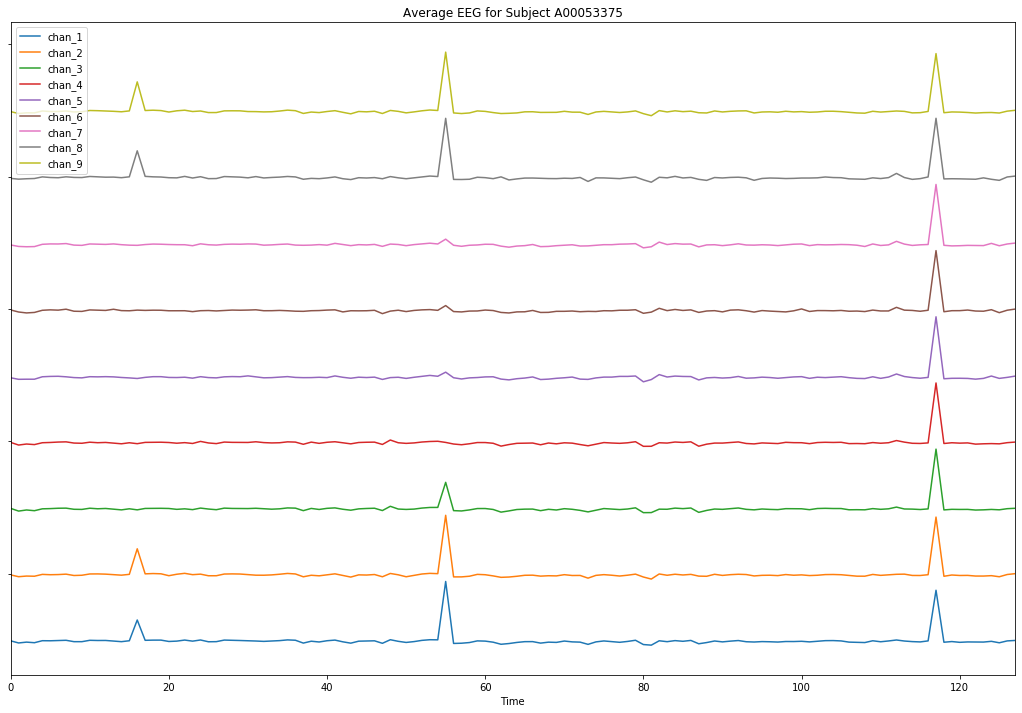

In [7]:
ax = means.plot(kind='line',x='index',y=list(means.columns)[1::])
fig = plt.gcf()
fig.set_size_inches(18,12)
#ax.set_ylim(top = 10000)
ax.set_xlabel('Time')
ax.set_yticklabels([])
ax.set_title('Average EEG for Subject ' + str(subject_ids[0]))
plt.show()

## Load Second Subject's Data and Process it Similarly
This subject seems to have additional channels. 

In [8]:
os.chdir(subjects[subject_ids[1]]['csv_path'])

In [12]:
means2 = pd.DataFrame()
chan = 1
for file in subjects[subject_ids[1]]['csv_list']:
    df = pd.read_csv(file, header=None)
    means2['chan_' + str(chan)] = df.mean(axis=1)
    print('Done loading channel ' + str(chan))
    if (chan == 1):
        means2.reset_index(level=0, inplace=True)
    chan += 1
means2

Done loading channel 1
Done loading channel 2
Done loading channel 3
Done loading channel 4
Done loading channel 5
Done loading channel 6
Done loading channel 7
Done loading channel 8
Done loading channel 9
Done loading channel 10
Done loading channel 11


,index,chan_1,chan_2,chan_3,chan_4,chan_5,chan_6,chan_7,chan_8,chan_9,chan_10,chan_11
0,0,-14150.054857,-14517.708808,-14876.494293,-14307.048579,-16801.960413,-15771.224551,-12420.092046,-11232.004958,-17729.891084,-13615.026391,-11604.208081
1,1,-11903.564137,-11236.777265,-11256.708634,-14355.863847,-14692.104779,-12849.545622,-11988.228820,-10819.084346,-14522.152308,-13816.763834,-12293.211080
2,2,-9560.369683,-8952.771883,-9091.614257,-9925.117378,-11076.603741,-10500.112517,-8474.120011,-8127.375092,-11232.550227,-10153.395419,-8679.655464
3,3,-6207.942880,-4798.670851,-4537.192743,-6241.898590,-6212.641842,-5689.827258,-2876.853043,-2108.545702,-6201.788497,-6045.150377,-3970.556996
4,4,-2325.425756,-480.488443,-83.894163,-4235.358462,-1207.880203,-1142.157724,-1367.005479,147.491749,-1014.599484,-4515.674989,-2871.448315
...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-3478.645180,-2223.735718,-1692.112382,-4842.805882,-4245.892295,-2707.743126,-3128.768794,-2616.303027,-3930.702844,-4385.959258,-2606.452616
124,124,-20383.934763,-20787.280116,-21295.083711,-19318.960165,-20632.244144,-22198.210142,-16168.037367,-14833.204799,-22112.903079,-18116.486253,-15523.784501
125,125,-9611.926695,-6561.012597,-5366.932899,-2264.566876,-7123.594525,-7349.259760,-3849.043453,-8121.133855,-8769.443486,-5429.527355,-3399.354010
126,126,-8543.579504,-7416.760788,-5389.133243,-4455.958700,-7068.598443,-6797.256250,-5723.591579,-6064.058718,-11727.108104,-6490.858899,-3269.849391


In [40]:
f = 50000
means2 = means2 - [0*f, 9*f, 8*f, 7*f, 6*f, 5*f, 4*f, 3*f, 2*f, 1*f, 10*f, 11*f]  

## Plot Second Subject's EEG Data Separately

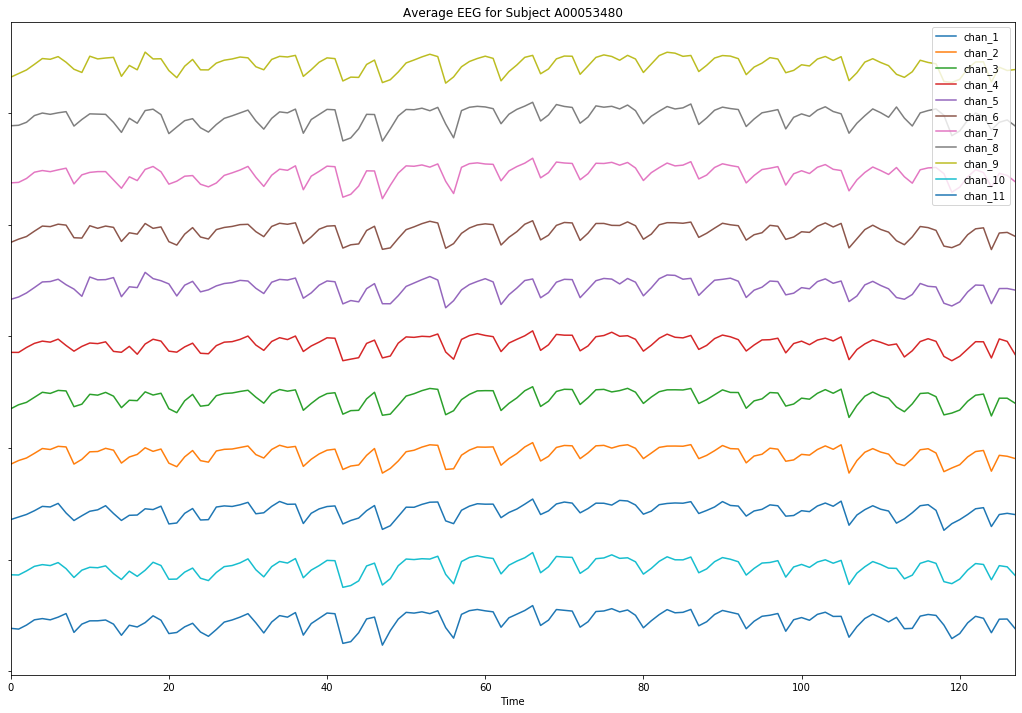

In [41]:
ax2 = means2.plot(kind='line',x='index',y=list(means2.columns)[1::])
fig2 = plt.gcf()
fig2.set_size_inches(18,12)
#ax2.set_ylim(top = 10000)
ax2.set_xlabel('Time')
ax2.set_yticklabels([])
ax2.set_title('Average EEG for Subject ' + str(subject_ids[1]))
plt.show()

## Plot Both Subjects on Same Plot
Note: I was unsure about how the channels should align, so I assumed the first 9 of the first subject match up with the first 9 of the second subject. This is most likely incorrect, but the goal of this excercise was to gain exposure to this type of data and begin thinking about how to visualize it and work with it, so I am not concerned with the correctness of the results as I am concerned with learning from the experience. 

In [42]:
f = 200000
means2 = means2 - [0*f, 9*f, 8*f, 7*f, 6*f, 5*f, 4*f, 3*f, 2*f, 1*f, 10*f, 11*f]  

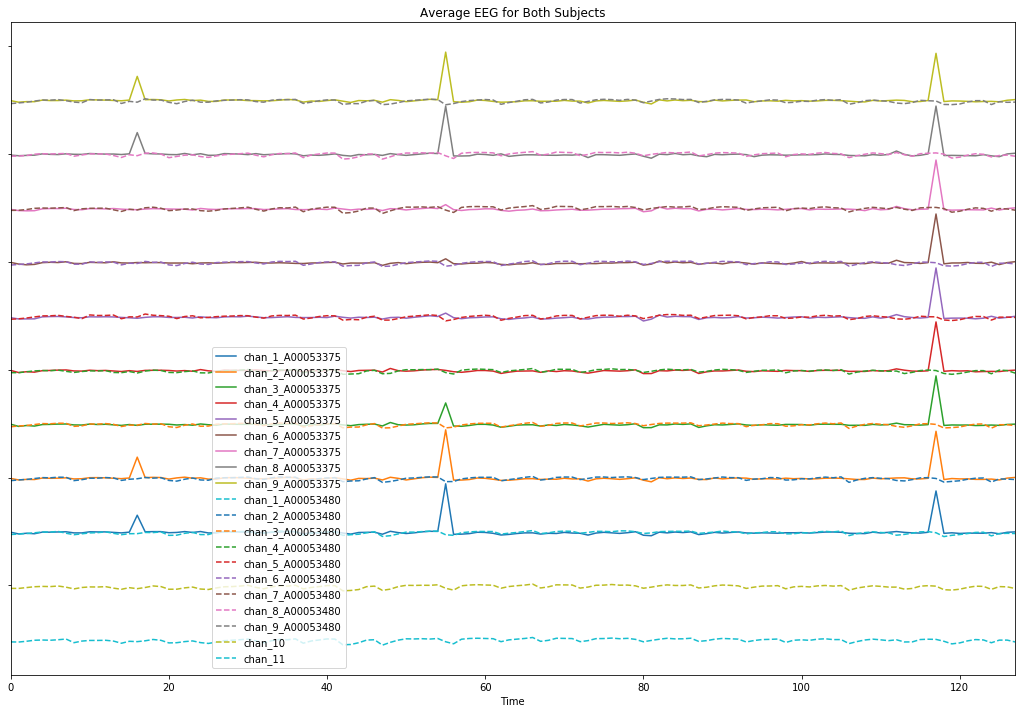

In [43]:
combined_means = means.merge(means2, how='outer', on='index', suffixes=("_" + subject_ids[0], "_" + subject_ids[1]))
ax3 = combined_means.plot(kind='line',x='index',y=list(combined_means.columns)[1::], style=['-']*(means.shape[1]-1) + ['--']*(means2.shape[1]-1))
fig3 = plt.gcf()
fig3.set_size_inches(18,12)
#ax3.set_ylim(top = 10000)
ax3.set_xlabel('Time')
ax3.set_yticklabels([])
ax3.legend(loc=(0.2,0.01))
ax3.set_title('Average EEG for Both Subjects')
plt.show()

In [16]:
combined_means

,index,chan_1_A00053375,chan_2_A00053375,chan_3_A00053375,chan_4_A00053375,chan_5_A00053375,chan_6_A00053375,chan_7_A00053375,chan_8_A00053375,chan_9_A00053375,...,chan_2_A00053480,chan_3_A00053480,chan_4_A00053480,chan_5_A00053480,chan_6_A00053480,chan_7_A00053480,chan_8_A00053480,chan_9_A00053480,chan_10,chan_11
0,0,-2.253500e+06,-2.004352e+06,-1.753003e+06,-1.503738e+06,-1.259606e+06,-1.003283e+06,-757787.444162,-506266.773792,-254036.302114,...,-2.514518e+06,-2.264876e+06,-2.014307e+06,-1.766802e+06,-1.515771e+06,-1.262420e+06,-1.011232e+06,-767729.891084,-513615.026391,-261604.208081
1,1,-2.261458e+06,-2.011118e+06,-1.763208e+06,-1.513700e+06,-1.265383e+06,-1.011052e+06,-763356.269088,-509135.316260,-261161.949518,...,-2.511237e+06,-2.261257e+06,-2.014356e+06,-1.764692e+06,-1.512850e+06,-1.261988e+06,-1.010819e+06,-764522.152308,-513816.763834,-262293.211080
2,2,-2.258299e+06,-2.008699e+06,-1.759038e+06,-1.509849e+06,-1.264969e+06,-1.014545e+06,-764495.195942,-507617.749597,-258531.342890,...,-2.508953e+06,-2.259092e+06,-2.009925e+06,-1.761077e+06,-1.510500e+06,-1.258474e+06,-1.008127e+06,-761232.550227,-510153.395419,-258679.655464
3,3,-2.260508e+06,-2.009355e+06,-1.761756e+06,-1.511962e+06,-1.264989e+06,-1.012697e+06,-763889.932563,-506687.566021,-258733.131026,...,-2.504799e+06,-2.254537e+06,-2.006242e+06,-1.756213e+06,-1.505690e+06,-1.252877e+06,-1.002109e+06,-756201.788497,-506045.150377,-253970.556996
4,4,-2.252924e+06,-2.002378e+06,-1.754675e+06,-1.504961e+06,-1.255758e+06,-1.004561e+06,-755300.446685,-500555.970854,-251583.477817,...,-2.500480e+06,-2.250084e+06,-2.004235e+06,-1.751208e+06,-1.501142e+06,-1.251367e+06,-9.998525e+05,-751014.599484,-504515.674989,-252871.448315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-2.258097e+06,-2.008675e+06,-1.758491e+06,-1.508997e+06,-1.261875e+06,-1.008093e+06,-760161.008983,-504239.300801,-257815.689568,...,-2.502224e+06,-2.251692e+06,-2.004843e+06,-1.754246e+06,-1.502708e+06,-1.253129e+06,-1.002616e+06,-753930.702844,-504385.959258,-252606.452616
124,124,-2.255283e+06,-2.007203e+06,-1.756973e+06,-1.508257e+06,-1.252983e+06,-1.002320e+06,-751795.939512,-509612.976191,-257296.930521,...,-2.520787e+06,-2.271295e+06,-2.019319e+06,-1.770632e+06,-1.522198e+06,-1.266168e+06,-1.014833e+06,-772112.903079,-518116.486253,-265523.784501
125,125,-2.260788e+06,-2.011307e+06,-1.758408e+06,-1.509134e+06,-1.261861e+06,-1.013579e+06,-760762.624375,-513604.416618,-259260.126579,...,-2.506561e+06,-2.255367e+06,-2.002265e+06,-1.757124e+06,-1.507349e+06,-1.253849e+06,-1.008121e+06,-758769.443486,-505429.527355,-253399.354010
126,126,-2.253697e+06,-2.002827e+06,-1.754154e+06,-1.504744e+06,-1.258063e+06,-1.004315e+06,-754101.789304,-500889.908217,-252178.736766,...,-2.507417e+06,-2.255389e+06,-2.004456e+06,-1.757069e+06,-1.506797e+06,-1.255724e+06,-1.006064e+06,-761727.108104,-506490.858899,-253269.849391


In [11]:
means

,index,chan_1,chan_2,chan_3,chan_4,chan_5,chan_6,chan_7,chan_8,chan_9
0,0,-2.253500e+06,-2.004352e+06,-1.753003e+06,-1.503738e+06,-1.259606e+06,-1.003283e+06,-757787.444162,-506266.773792,-254036.302114
1,1,-2.261458e+06,-2.011118e+06,-1.763208e+06,-1.513700e+06,-1.265383e+06,-1.011052e+06,-763356.269088,-509135.316260,-261161.949518
2,2,-2.258299e+06,-2.008699e+06,-1.759038e+06,-1.509849e+06,-1.264969e+06,-1.014545e+06,-764495.195942,-507617.749597,-258531.342890
3,3,-2.260508e+06,-2.009355e+06,-1.761756e+06,-1.511962e+06,-1.264989e+06,-1.012697e+06,-763889.932563,-506687.566021,-258733.131026
4,4,-2.252924e+06,-2.002378e+06,-1.754675e+06,-1.504961e+06,-1.255758e+06,-1.004561e+06,-755300.446685,-500555.970854,-251583.477817
...,...,...,...,...,...,...,...,...,...,...
123,123,-2.258097e+06,-2.008675e+06,-1.758491e+06,-1.508997e+06,-1.261875e+06,-1.008093e+06,-760161.008983,-504239.300801,-257815.689568
124,124,-2.255283e+06,-2.007203e+06,-1.756973e+06,-1.508257e+06,-1.252983e+06,-1.002320e+06,-751795.939512,-509612.976191,-257296.930521
125,125,-2.260788e+06,-2.011307e+06,-1.758408e+06,-1.509134e+06,-1.261861e+06,-1.013579e+06,-760762.624375,-513604.416618,-259260.126579
126,126,-2.253697e+06,-2.002827e+06,-1.754154e+06,-1.504744e+06,-1.258063e+06,-1.004315e+06,-754101.789304,-500889.908217,-252178.736766


In [17]:
means2

,index,chan_1,chan_2,chan_3,chan_4,chan_5,chan_6,chan_7,chan_8,chan_9,chan_10,chan_11
0,0,-2.764150e+06,-2.514518e+06,-2.264876e+06,-2.014307e+06,-1.766802e+06,-1.515771e+06,-1.262420e+06,-1.011232e+06,-767729.891084,-513615.026391,-261604.208081
1,1,-2.761904e+06,-2.511237e+06,-2.261257e+06,-2.014356e+06,-1.764692e+06,-1.512850e+06,-1.261988e+06,-1.010819e+06,-764522.152308,-513816.763834,-262293.211080
2,2,-2.759560e+06,-2.508953e+06,-2.259092e+06,-2.009925e+06,-1.761077e+06,-1.510500e+06,-1.258474e+06,-1.008127e+06,-761232.550227,-510153.395419,-258679.655464
3,3,-2.756208e+06,-2.504799e+06,-2.254537e+06,-2.006242e+06,-1.756213e+06,-1.505690e+06,-1.252877e+06,-1.002109e+06,-756201.788497,-506045.150377,-253970.556996
4,4,-2.752325e+06,-2.500480e+06,-2.250084e+06,-2.004235e+06,-1.751208e+06,-1.501142e+06,-1.251367e+06,-9.998525e+05,-751014.599484,-504515.674989,-252871.448315
...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-2.753479e+06,-2.502224e+06,-2.251692e+06,-2.004843e+06,-1.754246e+06,-1.502708e+06,-1.253129e+06,-1.002616e+06,-753930.702844,-504385.959258,-252606.452616
124,124,-2.770384e+06,-2.520787e+06,-2.271295e+06,-2.019319e+06,-1.770632e+06,-1.522198e+06,-1.266168e+06,-1.014833e+06,-772112.903079,-518116.486253,-265523.784501
125,125,-2.759612e+06,-2.506561e+06,-2.255367e+06,-2.002265e+06,-1.757124e+06,-1.507349e+06,-1.253849e+06,-1.008121e+06,-758769.443486,-505429.527355,-253399.354010
126,126,-2.758544e+06,-2.507417e+06,-2.255389e+06,-2.004456e+06,-1.757069e+06,-1.506797e+06,-1.255724e+06,-1.006064e+06,-761727.108104,-506490.858899,-253269.849391


## Lessons Learned
This exercise opened my eyes to several things:
1. EEG data seems to be more often compatable with MATLAB over Python
1. The data tend to be very large. We may want to think about this when designing our algorithm.
1. We may run into memory issues
1. I need to read about what EEG data means